Model SIR (Kerneck McKendrick 1927)

N - liczba osobnikow w populacji $\\$
S - grupa osob zdrowych podatnych na infekcje(susceptible)$\\$
I - grupa os. zainfekowanych(infected)$\\$
R - gr. ozdrowiencow lub odizolowanych(ew. zmarlcyh)(recovered)$\\$

Liczebnosc populacji w chwili t:
$\\N(t) = S(t) + I(t) + R(t)\\$

założenia:
1. do zarazenia moze dojsc tylko w wyniku bezposredniego kontaktu os. z gr. S z os. z gr. I
2. kazda os. z I moze zarazac os. z gr. S (tzn. dlugosc latencji choroby jest pomijana)
3. os. zdrowe z gr. S w momencie zarazenia przechodza do I ze stalym dodatnim wspolczynnikiem $\beta$ (os. chora zaraza w jednostce czasu $\beta*S(t)$ osob podatnych)
4. os. zainfekowane z I przechodza do ozdrowialych R ze stalym dodatnim wspolczynnikiem $\alpha$ ($\frac{1}{\alpha}$ - sredni czas trwania choroby)
5. nie uwzgledniamy procesow demograficznych $N(t) = N_0 = const.$

Schemat transmisji choroby:

  
S =($\beta I$)=> I =($\alpha$)=> R

$\frac{dS}{dt} = -\beta*S*I\\$
$\frac{dI}{dt} = \beta*S*I - \alpha*I\\$
$\frac{dR}{dt} = \alpha*I\\$

$N_0 = S(t) + I(t) + R(t)\\$
$\frac{dN_0}{dt} = \frac{dS}{dt} + \frac{dI}{dt} + \frac{dR}{dt} = 0\\$

Kiedy liczba zakazonych rosnie?

$\frac{dI}{dt} > 0\\$
$\beta*S*I - \alpha*I > 0\\$
$I(\beta*S - \alpha) > 0$ $|:I\\$
$\beta*S - \alpha > 0\\$
$S>\frac{\alpha}{\beta}$ <= liczba zakazonych rosnie $\\$

Parametr reprodukcji(odnowienia) wirusa:$\\$
$R_0 = \frac{\beta}{\alpha}*S(0)\\$

$1^o$ epidemia wygasa:$\\$
$R_0 < 1\\$

$2^o$ epidemia rozwija sie:$\\$
$R_0 > 1\\$

Aby nie dzialac na duzych liczbach uwzgledniamy nasze wartosci:$\\$
$r(t) = \frac{R(t)}{N_0}\\$
$s(t) = \frac{S(t)}{N_0}\\$
$i(t) = \frac{I(t)}{N_0}\\$
$\beta ' = \frac{\beta}{N_0}\\$

$\frac{ds}{dt} = -\beta*s*i\\$
$\frac{di}{dt} = \beta*s*i - \alpha*i\\$
$\frac{dr}{dt} = \alpha*i\\$

Rownanie Rungego-Kutty 4 rzedu:$\\$
$x(t+h) \approx x(t) + \frac{1}{6}(F_1+2F_2+2F_3+F4)\\$
$F_1 = h*f(t,x)\\$
$F_2 = h*f(t+\frac{1}{2}h,x+\frac{1}{2}F_1)\\$
$F_3 = h*f(t+\frac{1}{2}h,x+\frac{1}{2}F_2)\\$
$F_4 = h*f(t+h,x+\frac{1}{2}F_3)\\$

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def s_prim(beta, s, i):
    return -beta*s*i

def i_prim(alpha, beta, s, i):
    return beta*s*i - alpha*i

def r_prim(alpha, i):
    return alpha*i

def s_RK4(beta, s, i, h):
    F1 = h * s_prim(beta, s[-1], i[-1])
    F2 = h * s_prim(beta, s[-1]+0.5*h, i[-1]+0.5*F1)
    F3 = h * s_prim(beta, s[-1]+0.5*h, i[-1]+0.5*F2)
    F4 = h * s_prim(beta, s[-1]+h, i[-1]+0.5*F3)

    return s[-1] + (F1+2*F2+2*F3+F4)/6

def i_RK4(alpha, beta, s, i, h):
    F1 = h * i_prim(alpha, beta, s[-1], i[-1])
    F2 = h * i_prim(alpha, beta, s[-1]+0.5*h, i[-1]+0.5*F1)
    F3 = h * i_prim(alpha, beta, s[-1]+0.5*h, i[-1]+0.5*F2)
    F4 = h * i_prim(alpha, beta, s[-1]+h, i[-1]+0.5*F3)

    return i[-1] + (F1+2*F2+2*F3+F4)/6

def r_RK4(alpha, i, h, r):
    F1 = h * r_prim(alpha, i[-1])
    F2 = h * r_prim(alpha, i[-1]+0.5*F1)
    F3 = h * r_prim(alpha, i[-1]+0.5*F2)
    F4 = h * r_prim(alpha, i[-1]+0.5*F3)

    return r[-1] + (F1+2*F2+2*F3+F4)/6


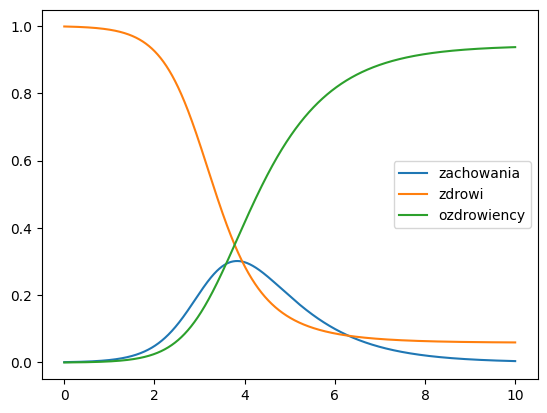

In [20]:
N = []
i = [0.001]
s = [1-i[0]]
r = [0]

alpha = 1
beta = 3

h=0.001

t_space = np.arange(0,10,h)

for t in t_space:
    di, ds, dr = i_RK4(alpha, beta, s, i, h), s_RK4(beta, s, i, h), r_RK4(alpha, i, h, r)
    i.append(di)
    s.append(ds)
    r.append(dr)


plt.plot(t_space, i[:-1], label='zachowania')
plt.plot(t_space, s[:-1], label='zdrowi')
plt.plot(t_space, r[:-1], label='ozdrowiency')
plt.legend()
plt.show()